In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


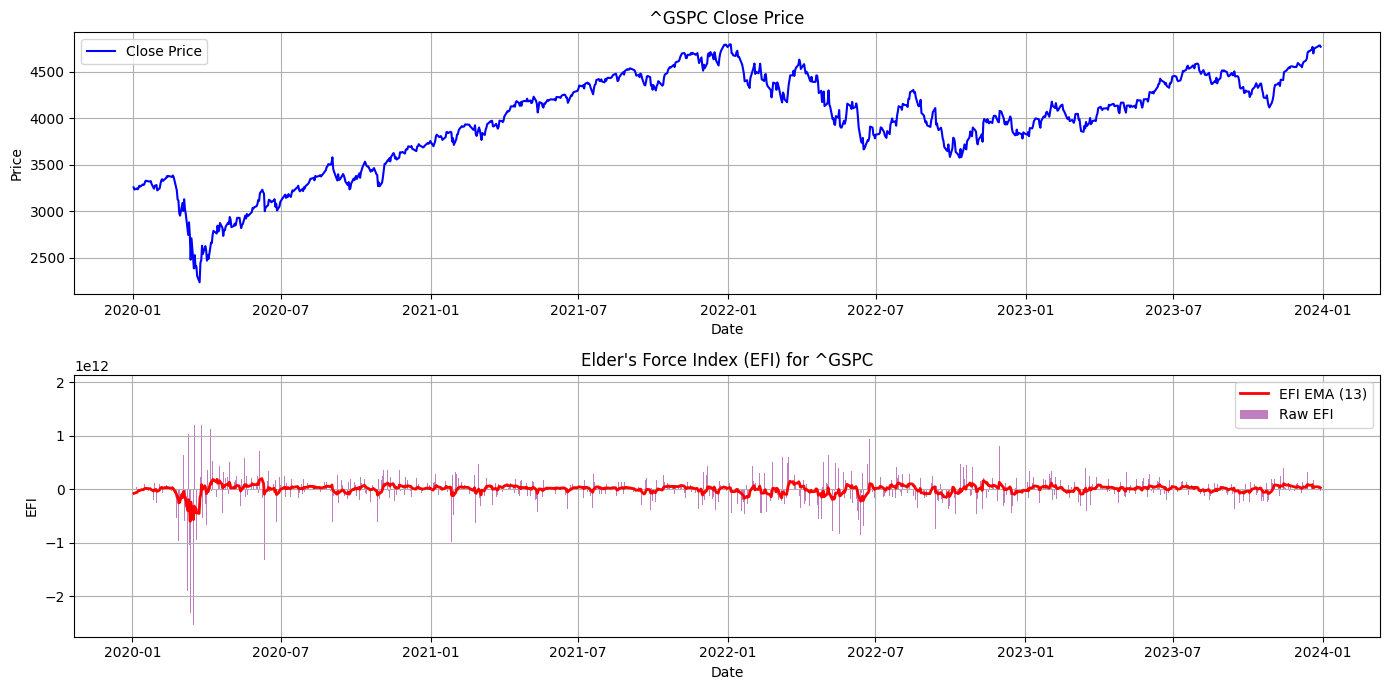

In [4]:


# Step 2: Calculate Elder's Force Index
def calculate_efi(data, ema_period=13):
    # Calculate raw EFI
    data['EFI'] = (data['Close'] - data['Close'].shift(1)) * data['Volume']
    
    # Smooth EFI using EMA
    data['EFI_EMA'] = data['EFI'].ewm(span=ema_period, adjust=False).mean()
    return data



In [7]:
def show_graph(symbol):
    
    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply EFI calculation
    ema_period = 13  # Adjust the EMA period as needed
    data = calculate_efi(data, ema_period)
    
    # Step 3: Plot Close Price and EFI
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot EFI
    plt.subplot(2, 1, 2)
    plt.bar(data.index, data['EFI'], label='Raw EFI', color='purple', alpha=0.5)
    plt.plot(data['EFI_EMA'], label=f'EFI EMA ({ema_period})', color='red', linewidth=2)
    plt.title(f"Elder's Force Index (EFI) for {symbol}")
    plt.xlabel('Date')
    plt.ylabel('EFI')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


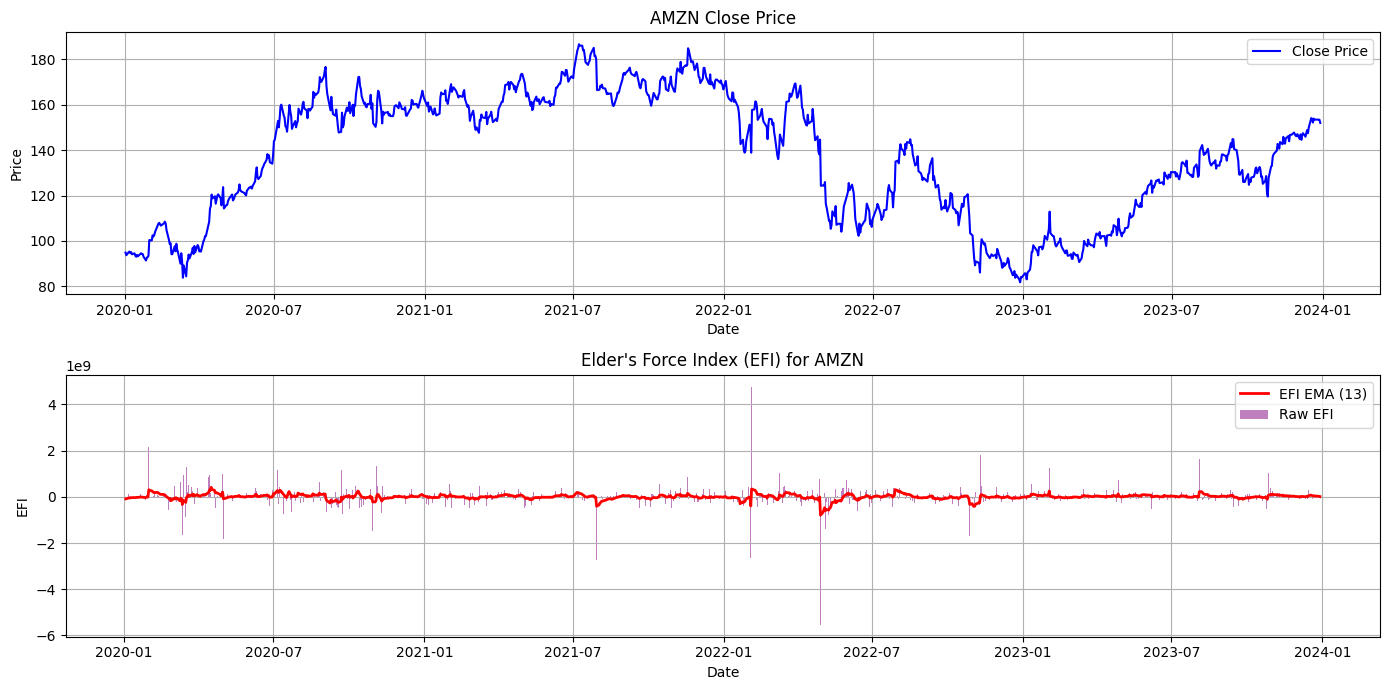

In [8]:
show_graph("AMZN")